In [11]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("../../files/df_nulos_imputados.csv", index_col=0)

Revisamos las tres columnas de satisfacción y sus medias/medianas

In [13]:
df[['EnvironmentSatisfaction' , 'JobSatisfaction' , 'RelationshipSatisfaction']].agg(['mean' , 'median'])

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
mean,1.104287,2.730646,2.714012
median,1.000000,3.000000,3.000000


Observamos que las encuestas de environment satisfaction son muy bajas en comparación con job y relationship satisfaction, lo cual puede impactar en la media resultante. Por tanto, decidimos hacer una media ponderada y darle un peso determinado a cada una de las variables para tratar de mitigar dicho impacto:

**Distribución de pesos**
- EnvironmentSatisfaction: 20%
- JobSatisfaction: 40%
- RelationshipSatisfaction: 40%

Creamos la columna de Overall Satisfaction teniendo esto en cuenta

In [14]:
# Definimos los pesos
weights = {
    'EnvironmentSatisfaction': 0.20,
    'JobSatisfaction': 0.40,
    'RelationshipSatisfaction': 0.40
}

# Calculamos la media ponderada
df['OverallSatisfaction'] = round(
    df['EnvironmentSatisfaction'] * weights['EnvironmentSatisfaction'] +
    df['JobSatisfaction'] * weights['JobSatisfaction'] +
    df['RelationshipSatisfaction'] * weights['RelationshipSatisfaction']
, 0)

In [15]:
df['OverallSatisfaction']

0       3.0
1       2.0
2       3.0
3       2.0
4       2.0
       ... 
1558    3.0
1559    2.0
1560    2.0
1561    3.0
1562    2.0
Name: OverallSatisfaction, Length: 1563, dtype: float64

In [16]:
df['TestGroup'] = df['OverallSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [17]:
tabla_contingencia_porcentaje = pd.crosstab(df['TestGroup'], df['Attrition'], normalize = True) * 100
tabla_contingencia = pd.crosstab(df['TestGroup'], df['Attrition']) 
tabla_contingencia

Attrition,No,Yes
TestGroup,,
insatisfechos,638,144
satisfechos,673,108


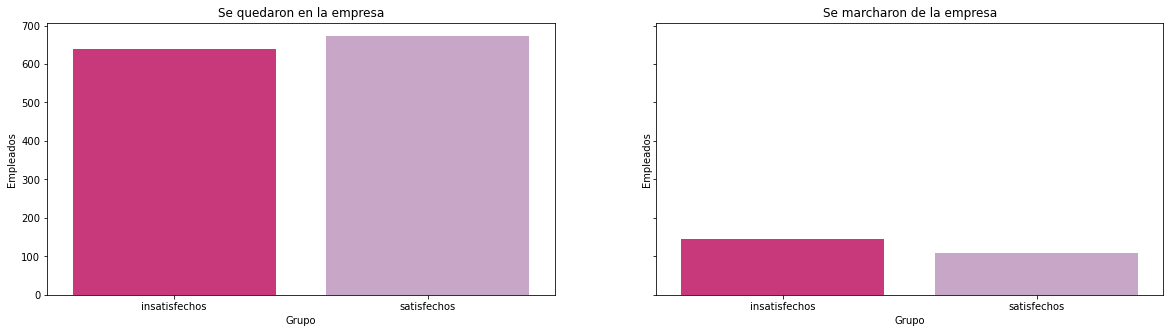

In [18]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia.index, y="No", data=tabla_contingencia,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia.index, y="Yes", data=tabla_contingencia,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [19]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.01656162686117298 hay una diferencia significativa en la cantidad de attrition según el grupo
